<a href="https://colab.research.google.com/github/timsd/Learning/blob/master/Stage_B_Olodude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np 
import matplotlib.pyplot as plt  
import matplotlib.gridspec as gridspec
import seaborn as sns 
import pandas as pd

In [9]:
from scipy.sparse import csr_matrix    
%matplotlib inline

In [5]:
sns.despine() 
plt.rc('figure', figsize=(20,10)) 


<Figure size 1440x720 with 0 Axes>

In [30]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [33]:
column_names   =   { 'X1' : 'Relative_Compactness' ,   
                     'X2' :    'Surface_Area' ,                    
                     'X3' :     'Wall_Area' ,    
                     'X4' :    'Roof_Area' ,    
                     'X5' :    'Overall_Height' ,                
                     'X6' :    'Orientation' ,    
                     'X7' :    'Glazing_Area' ,                
                     'X8' :    'Glazing_Area_Distribution' ,                   
                     'Y1' :    'Heating_Load' ,'Y2' :    'Cooling_Load' } 

In [34]:
df = df.rename(columns=column_names) 
df.describe(include='all')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [36]:
simple_linear_reg_df = df[['Relative_Compactness','Heating_Load']].sample(15, random_state=2)

In [39]:
spr =(df.corr()["Heating_Load"].sort_values(ascending = False)[1:10]) 
print(spr) 

Cooling_Load                 0.975862
Overall_Height               0.889430
Relative_Compactness         0.622272
Wall_Area                    0.455671
Glazing_Area                 0.269842
Glazing_Area_Distribution    0.087368
Orientation                 -0.002587
Surface_Area                -0.658120
Roof_Area                   -0.861828
Name: Heating_Load, dtype: float64


In [40]:
from sklearn.datasets import make_regression 
from matplotlib import pyplot 

In [41]:
Xb,yb = make_regression(n_samples=768, n_features=8, noise=10,random_state=1)

In [42]:
df5=pd.DataFrame(Xb,yb) 
df5.reset_index() 
df5.head()


,0,1,2,3,4,5,6,7
-159.545645,-0.744387,-0.394079,-0.707782,-0.319029,0.267762,-0.478694,-0.380659,0.307383
-20.953029,0.346482,-0.582494,-0.303334,1.156329,-0.853881,0.032758,-0.072620,0.064841
-53.315416,0.001055,-0.859827,-2.026206,1.458773,0.539138,-1.089535,1.648551,-0.437908
265.172028,-0.074497,-0.572602,2.384405,-0.026964,1.861565,-1.618318,2.134552,-1.649750
-353.390003,-0.212508,-1.068460,-0.683713,0.316530,-0.407013,-1.168142,-0.058339,-2.844938


In [43]:
column_names = {0:'Relative_Compactness', 1: 'Surface_Area', 2: 'Wall_Area', 3: 'Roof_Area', 4: 'Overall_Height', 5: 'Orientation', 6: 'Glazing_Area', 7: 'Glazing_Area_Distribution'}
df5 = df5.rename(columns=column_names) 
df5.head() 

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
-159.545645,-0.744387,-0.394079,-0.707782,-0.319029,0.267762,-0.478694,-0.380659,0.307383
-20.953029,0.346482,-0.582494,-0.303334,1.156329,-0.853881,0.032758,-0.072620,0.064841
-53.315416,0.001055,-0.859827,-2.026206,1.458773,0.539138,-1.089535,1.648551,-0.437908
265.172028,-0.074497,-0.572602,2.384405,-0.026964,1.861565,-1.618318,2.134552,-1.649750
-353.390003,-0.212508,-1.068460,-0.683713,0.316530,-0.407013,-1.168142,-0.058339,-2.844938


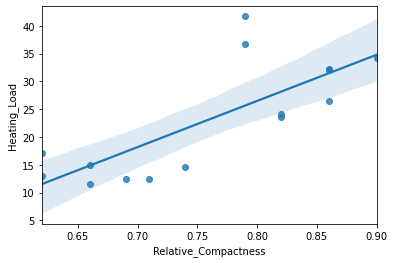

In [49]:
sns.regplot(x= "Relative_Compactness", y="Heating_Load", 
            data=simple_linear_reg_df)

In [53]:
from sklearn.model_selection import train_test_split # to split the data 
from sklearn.linear_model import LinearRegression 

In [55]:
X =  df[['Relative_Compactness']] #chosen predictor 
y=  df[['Heating_Load']] 

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1) 
lR = LinearRegression().fit(X_train, y_train) 
lR_pred= lR.predict(X_test) # the predicted vriable


Text(0, 0.5, 'Predicted Values')

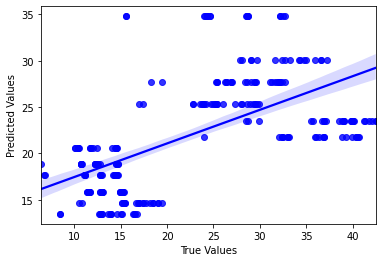

In [57]:
sns.regplot(x= y_test,y=lR_pred,color='blue') 
plt.xlabel("True Values") 
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

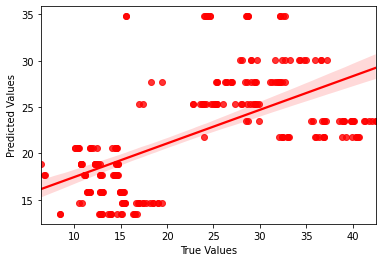

In [62]:
sns.regplot(x= y_test,y=lR_pred,color='red') 
plt.xlabel("True Values") 
plt.ylabel("Predicted Values")

In [63]:
Xc =  df5[['Relative_Compactness']] 
X_train1,X_test1,y_train1,y_test1 = train_test_split(Xc,yb,test_size=0.33,random_state=1)
lRD = LinearRegression().fit(X_train1, y_train1)
lRD_pred= lRD.predict(X_test1)

Text(0, 0.5, 'Dummy Predicted Values')

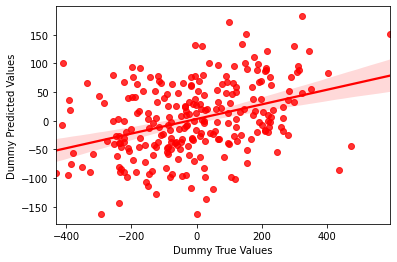

In [64]:
sns.regplot(x= y_test1,y=lRD_pred,color='red')
plt.xlabel("Dummy True Values")
plt.ylabel("Dummy Predicted Values") 

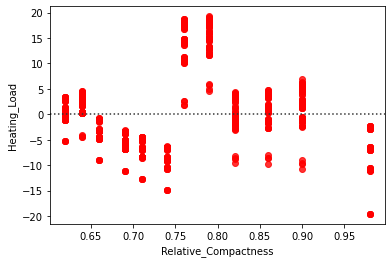

In [65]:
sns.residplot(x=X, y=y,color="red", 
data=df)

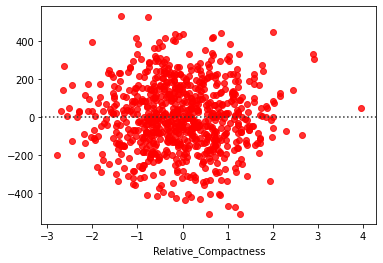

In [66]:
sns.residplot(x=Xc, y=yb,color="red", 
data=df)

In [69]:
d= np.floor(y_test) 
stuff=pd.DataFrame(d) 
e= np.floor(lR_pred) 
stuff2=pd.DataFrame(e) 
stuff.reset_index(drop=True,inplace=True) 
f=stuff["Heating_Load"]-stuff2[0]

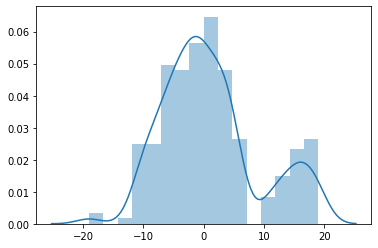

In [70]:
sns.distplot(f)

In [72]:
h= np.floor(y_test1) 
buff=pd.DataFrame(h) 
i= np.floor(lRD_pred) 
buff2=pd.DataFrame(i) 
buff.reset_index(drop=True,inplace=True) 
j=buff[0]-buff2[0]

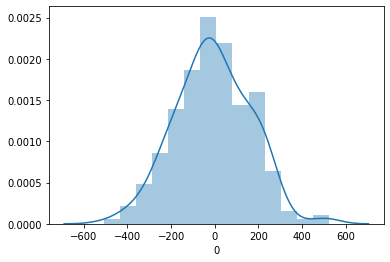

In [73]:
sns.distplot(j) #sns.distplot(j,kde_kws={'bw':1.5},hist=False)

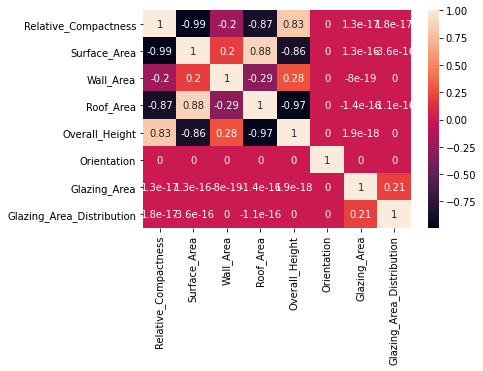

In [74]:
dfa=df.drop(["Cooling_Load","Heating_Load"],axis=1) #removing the target variable so observe 
#the relationship between predictors 
sns.heatmap(dfa.corr(),annot=True)

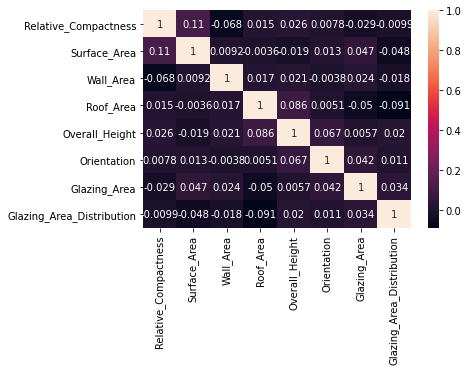

In [75]:
sns.heatmap(df5.corr(),annot=True)

In [77]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) 
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load'] 

In [78]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_tests = train_test_split(features_df, heating_target, 
test_size=0.3, random_state=1) 
linear_model = LinearRegression()

In [82]:
linear_model.fit(x_train, y_train) #obtain predictions 
predicted_values = linear_model.predict(x_test)

In [84]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_tests, predicted_values) 
round(mae, 3)

0.063

In [85]:
import numpy as np 
y_test6=np.array(y_tests) 
predicted_values6= np.array(predicted_values) 
rss = np.sum(np.square(y_test6-predicted_values6)) 
round(rss,3)


1.823

In [88]:
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_tests, predicted_values)) 
round(rmse, 3)

0.089

In [89]:
from sklearn.metrics import r2_score 
r2_score = r2_score(y_tests, predicted_values) 
round(r2_score, 3)

0.893

In [90]:
dfv=df 
dfv["interaction"] =dfv["Overall_Height"]*dfv["Relative_Compactness"]

In [91]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
normalised_dfv = pd.DataFrame(scaler.fit_transform(dfv), columns=dfv.columns) 
features_dfv = normalised_dfv.drop(columns=['Heating_Load', 'Cooling_Load']) 
heating_target = normalised_dfv['Heating_Load']

In [93]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_tests = train_test_split(features_dfv, heating_target, 
                                                     test_size=0.3, random_state=1) 
linear_model = LinearRegression() #fit the model to the training dataset 
linear_model.fit(x_train, y_train) #obtain predictions 
predicted_values = linear_model.predict(x_test) 


In [94]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_tests, predicted_values)) 
round(rmse, 3) 

0.084

In [95]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=0.5) 
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.001) 
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
from sklearn.linear_model import ElasticNet 
regr = ElasticNet(alpha=0.0001) 
regr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09548138238157744, tolerance: 0.003944969110754326
  positive)


ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [117]:
#comparing the effects of regularisation 
def get_weights_df(model, feat, col_name): 
  weights = pd.Series(model.coef_, feat.columns) .sort_values()
   weights_df = pd.DataFrame(weights) .reset_index()    
weights_df.columns = ['Features', col_name]    
weights_df[col_name].round(3)    
return weights_df 
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight') 
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight') 
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight') 
elastic_weights_df = get_weights_df(regr, x_train, 'elastic_weight') 
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features') 
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features') 
final_weights = pd.merge(final_weights, elastic_weights_df, on='Features')

final_weights

IndentationError: ignored

In [118]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import ElasticNet # find optimal alpha with grid search 
alpha = [0.0001, 0.00015, 0.00016, 0.0002, 0.001, 0.003] #I selectected a range of values to form a grid to search
 # i did not want to be adventurerous because I already know the answer from the previous lesson 
 l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  
 param_grid = dict(alpha=alpha, l1_ratio=l1_ratio) 
 grid = GridSearchCV(estimator=ElasticNet(max_iter=100000), param_grid=param_grid, scoring='r2', verbose=1, n_jobs= 
                     grid_result = grid.fit(x_train, y_train) 
                     print('Best Score: ', grid_result.best_score_)
                     
                      print('Best Params: ', grid_result.best_params_)

IndentationError: ignored

In [103]:
from sklearn.model_selection import RandomizedSearchCV 
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] 
alpha = [0.0001, 0.003, 0.00015, 0.00016, 0.0002, 0.001, 0.003] #searches values randomly among these max_iter=10000 
param_distributions = dict(l1_ratio=l1_ratio,alpha=alpha) 
utility = RandomizedSearchCV(estimator=ElasticNet(max_iter=100000),                           
                             param_distributions=param_distributions,random_state=0) 
result = utility.fit(x_train, y_train) 
print('Best Score: ', result.best_score_) 
print('Best Params: ', result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.207520757829481, tolerance: 0.0031462708831570254
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.17356193979055, tolerance: 0.0032101700982193095
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2203275475430404, tolerance: 0.0031758795041326245
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

Best Score:  0.9234579348913735
Best Params:  {'l1_ratio': 0, 'alpha': 0.00016}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.483156346140629, tolerance: 0.003944969110754326
  positive)
